
**Question 1: What is Simple Linear Regression?**

**Answer:**

Simple Linear Regression is a **statistical method** used to study the relationship between two variables:

* **Independent variable (X):** The predictor or input variable.
* **Dependent variable (Y):** The outcome or response variable.

It assumes that the relationship between X and Y can be approximated with a straight line. The model is represented as:

$$
Y = \beta_0 + \beta_1 X + \varepsilon
$$

Where:

* $Y$ = dependent variable (what we want to predict)
* $X$ = independent variable (predictor)
* $\beta_0$ = intercept (value of Y when X = 0)
* $\beta_1$ = slope (change in Y for a one-unit change in X)
* $\varepsilon$ = error term (captures randomness or factors not explained by X)

---
**Question 2: What are the key assumptions of Simple Linear Regression?**

**Answer**

 **Key Assumptions of Simple Linear Regression**

1. **Linearity**

   * The relationship between the independent variable (X) and dependent variable (Y) is linear.
   * That means if you plot X vs. Y, the trend should roughly look like a straight line.

2. **Independence of Errors**

   * Residuals (errors) should be independent of each other.
   * In other words, the value of one error should not depend on another (important in time series).

3. **Homoscedasticity (Constant Variance of Errors)**

   * The variance of residuals (errors) is the same across all values of X.
   * If errors “fan out” or “shrink” at different X values, the assumption is violated.

4. **Normality of Errors**

   * Residuals should be approximately normally distributed.
   * This is especially important for hypothesis testing and confidence intervals.

5. **No (or little) Multicollinearity** *(applies more to multiple regression, but still relevant)*

   * Since SLR has only one predictor, this means X should not be a constant or have extreme correlation with other hidden variables.

---

**Question 3: What is heteroscedasticity, and why is it important to address in regression models?**

**Answer**

In regression, heteroscedasticity occurs when the variance of the residuals (errors) is not constant across all values of the independent variable(s).

Ideally, residuals should be evenly spread (homoscedasticity). But if the spread increases or decreases with X, that’s heteroscedasticity.

**Example:**
If you are predicting income based on years of education, the variation in income might be small for low education levels but very large for high education levels.

In a residual vs. fitted values plot:

Homoscedasticity: Residuals look like random scatter.

Heteroscedasticity: Residuals form patterns (like a cone shape — spreading wider or narrowing).

**Why is it important to address?**

**1.Biased Standard Errors**

Regression coefficients (β) are still unbiased, but standard errors become unreliable.

This can lead to incorrect hypothesis testing (t-tests, p-values, confidence intervals).

**2.Invalid Statistical Inference**

You might wrongly conclude that a predictor is significant (Type I error) or miss a significant predictor (Type II error).

**3.Poor Predictions**

If error variance changes with X, prediction intervals will be misleading — too narrow in some regions, too wide in others

---
**Question 4: What is Multiple Linear Regression?**

**Answer**


Multiple Linear Regression is a statistical technique that models the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, …, Xₙ).
Unlike Simple Linear Regression (only one predictor), MLR allows us to study how several predictors together explain or predict the outcome.

 **Mathematical Form**

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \varepsilon
$$

Where:

* $Y$ = dependent variable (what we want to predict)
* $X_1, X_2, \dots, X_n$ = independent variables (predictors)
* $\beta_0$ = intercept
* $\beta_1, \beta_2, \dots, \beta_n$ = regression coefficients (effect of each predictor on Y, holding others constant)
* $\varepsilon$ = error term

---

**Question 5: What is polynomial regression, and how does it differ from linear regression?**

**Answer**

Polynomial Regression is a regression technique where the relationship between the independent variable $X$ and the dependent variable $Y$ is modeled as a polynomial of degree $n$.

The general form is:

$$
Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \dots + \beta_nX^n + \varepsilon
$$

Here, instead of fitting just a straight line, we allow the model to fit a **curved line**, which helps capture more complex, non-linear patterns in the data.


**How it differs from Linear Regression**

* In **Linear Regression**, the relationship between $X$ and $Y$ is assumed to be a straight line. The equation is:

  $$
  Y = \beta_0 + \beta_1X + \varepsilon
  $$

* In **Polynomial Regression**, the model includes higher powers of $X$ (like $X^2, X^3,$ etc.), so the fitted curve can bend and better represent non-linear relationships.

* Linear regression is simple and easy to interpret, but it cannot capture curved patterns. Polynomial regression is more flexible and can capture curves, but at the cost of higher complexity and risk of overfitting if the degree is too high.



---



Intercept (β0): 0.17999999999999794
Slope (β1): 1.9800000000000004


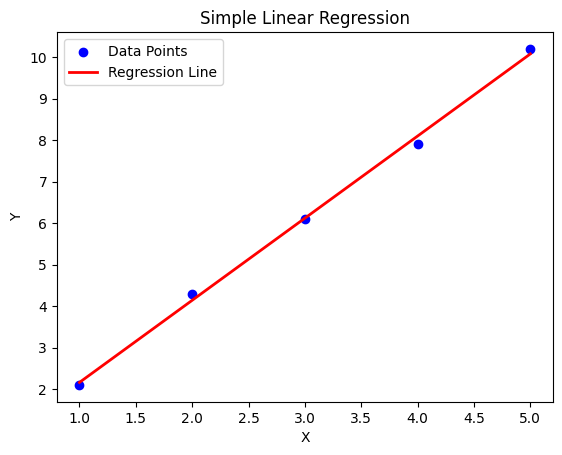

In [1]:
'''
Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)   # Independent variable
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])       # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Regression coefficients
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])

# Plot
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


In [3]:
'''
Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results
'''
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample Data
data = {
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

# Independent (X) and Dependent (Y) variables
X = df[["Area", "Rooms"]]
Y = df["Price"]

# Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X, Y)

# Regression coefficients
print("Intercept (β0):", model.intercept_)
print("Coefficients (β):", model.coef_)


# Add constant for intercept (required by statsmodels VIF)
X_with_const = np.append(arr=np.ones((X.shape[0],1)), values=X, axis=1)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = ["Intercept"] + list(X.columns)
vif_data["VIF"] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Intercept (β0): 103157.89473684214
Coefficients (β): [   63.15789474 34736.84210526]

Variance Inflation Factors (VIF):
     Feature        VIF
0  Intercept  34.210526
1       Area   7.736842
2      Rooms   7.736842


Intercept (β0): 0.06000000000000938
Coefficients (β): [0.   1.94 0.2 ]


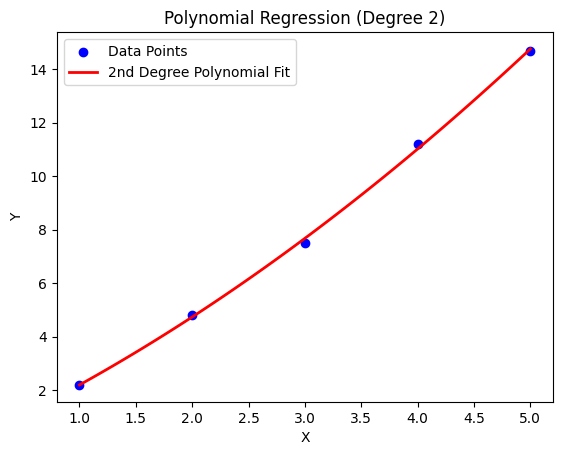

In [4]:
'''
Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, Y)

# Predictions
X_range = np.linspace(1, 5, 100).reshape(-1, 1)  # Smooth curve
Y_pred = model.predict(poly.transform(X_range))

# Coefficients
print("Intercept (β0):", model.intercept_)
print("Coefficients (β):", model.coef_)

# Plot
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X_range, Y_pred, color='red', linewidth=2, label='2nd Degree Polynomial Fit')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()



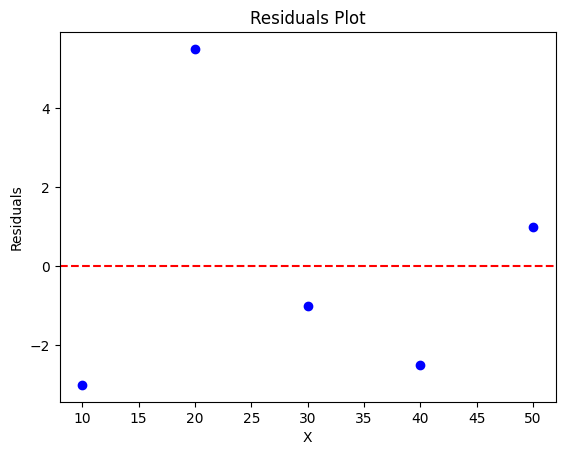

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [5]:
'''
Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Linear Regression
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# Plot Residuals
plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

# Print residuals for inspection
print("Residuals:", residuals)


**Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location.However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust model.**

**Answer**

**Steps to Address Heteroscedasticity**

1. **Residual Diagnostics**

   * Plot residuals vs. predicted values to confirm heteroscedasticity.

2. **Transform the Dependent Variable (Y)**

   * Apply log or square-root transformation:

     $$
     \log(\text{Price}) \sim \text{Area, Rooms, Location}
     $$
   * This stabilizes variance.

3. **Weighted Least Squares (WLS)**

   * Assign weights inversely proportional to error variance → gives less importance to high-variance observations.

4. **Robust Standard Errors**

   * Use **heteroscedasticity-consistent (HC/White’s)** robust errors for valid inference without changing coefficients.

 **Steps to Address Multicollinearity**

1. **Check Correlations & VIF**

   * Calculate **Variance Inflation Factor (VIF)** for each predictor.
   * If VIF > 5 (moderate) or > 10 (serious), multicollinearity is a problem.

2. **Feature Selection**

   * Drop or merge highly correlated predictors (e.g., Area and Rooms might overlap).
   * Keep the more meaningful one (e.g., Area).

3. **Dimensionality Reduction**

   * Use **Principal Component Analysis (PCA)** to combine correlated variables into independent components.

4. **Regularization Techniques**

   * Use **Ridge Regression** (shrinks coefficients but keeps all features).
   * Use **Lasso Regression** (performs feature selection by driving some coefficients to zero).

---



